<a href="https://colab.research.google.com/github/MiwaSugitani/MiwaSugitani/blob/main/CA_%E8%AA%B2%E9%A1%8C%EF%BC%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install ucimlrepo

In [53]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
covertype = fetch_ucirepo(id=31)

# data (as pandas dataframes)
X = covertype.data.features.drop('Cover_Type', axis=1)
y = covertype.data.features['Cover_Type']

# metadata
print(covertype.metadata)

# variable information
# print(covertype.variables)

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 52, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Fri Oct 27 2023', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest

In [57]:
import pandas as pd
import numpy as np
from pandas import DataFrame

df = DataFrame(data=X, columns=covertype.feature_names).assign(Cover_Type=np.array(y))
df

,,,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
2596,51,3,258,0,510,221,232,148,6279,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2590,56,2,212,-6,390,220,235,151,6225,1,0,0,...,0,0,0,0,0,0,0,0,0,5
2804,139,9,268,65,3180,234,238,135,6121,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2785,155,18,242,118,3090,238,238,122,6211,1,0,0,...,0,0,0,0,0,0,0,0,0,2
2595,45,2,153,-1,391,220,234,150,6172,1,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,153,20,85,17,108,240,237,118,837,0,0,1,...,0,0,0,0,0,0,0,0,0,3
2391,152,19,67,12,95,240,237,119,845,0,0,1,...,0,0,0,0,0,0,0,0,0,3
2386,159,17,60,7,90,236,241,130,854,0,0,1,...,0,0,0,0,0,0,0,0,0,3
2384,170,15,60,5,90,230,245,143,864,0,0,1,...,0,0,0,0,0,0,0,0,0,3


<Axes: xlabel='Wilderness_Area', ylabel='Cover_Type'>

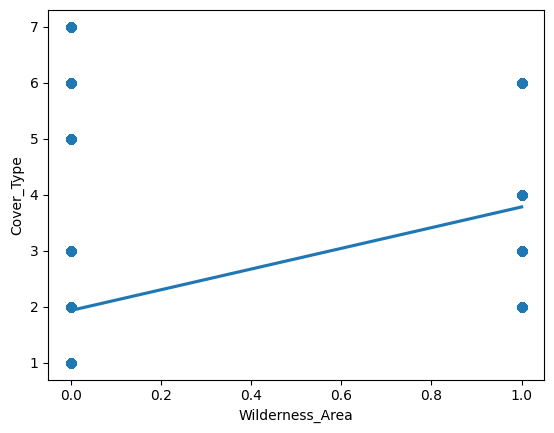

In [45]:
import seaborn as sns

sns.regplot(x='Wilderness_Area', y='Cover_Type', data=df)

In [59]:
# scikit-learnの準備
from sklearn.model_selection import train_test_split
# 訓練データとテストデータに8:2で分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 線形回帰で学習
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# 訓練データを用いた評価
print(model.score(X_train, y_train))
# テストデータを用いた評価
print(model.score(X_test, y_test))

0.3059069171676928
0.3105128156166773
